In [3]:
import pandas as pd
import numpy as np
import torch.multiprocessing as mp
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
from scipy.interpolate import interp1d
import Categorization
import torch
import copy
from torch.nn.functional import one_hot
import imblearn
from collections import Counter
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from dask.dataframe import from_pandas
from tsfresh.utilities.distribution import MultiprocessingDistributor
import hashlib 
from sklearn.metrics import precision_recall_fscore_support
from importlib import reload
from temporalHelper import TemporalHelper as TH
from concurrent.futures import ProcessPoolExecutor
from PIL import Image
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from kmodes.kmodes import KModes
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import imblearn


In [4]:
data = pd.read_csv("./categorisedData/staticDataSimple.csv")

# target = data['deathperiod']
target = data['Mortality14Days']

data = data.set_index('PatientID')

# data = data.drop('deathperiod', axis=1)
data = data.drop('Mortality14Days', axis=1)

data

,los_high,los_low,los_medium,age_high,age_low,age_medium,comorbidity_high,comorbidity_low,comorbidity_medium,sofa_high,...,renal_high,renal_low,renal_medium,cardiovascular_high,cardiovascular_low,cns_high,cns_low,cns_medium,gender_female,gender_male
PatientID,,,,,,,,,,,,,,,,,,,,,
181199,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
167020,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
169463,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
183338,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
192665,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106017,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
186511,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
188867,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [103]:
# x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# clf = DecisionTreeClassifier(random_state=0)

# clf = clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test)

# display(f1_score(y_test, y_pred, average='macro'))
# display(recall_score(y_test, y_pred, average='macro'))
# display(precision_score(y_test, y_pred, average='macro'))

# thresh = 0.03

# imp = clf.feature_importances_
# plt.bar(list(range(len(imp))), imp)
# plt.axhline(y=thresh, color='r')
# plt.show()

In [104]:
# featuresToKeep = [clf.feature_names_in_[i] for i in range(len(imp)) if imp[i] > thresh]

# featuresToKeep

# featureSelectedDF = data[featuresToKeep]
# featureSelectedDF['Mortality14Days'] = target.values
# featureSelectedDF

In [105]:
# featureSelectedDF.to_csv("./categorisedData/expertLabelledDataSimple_featureSelected.csv")

In [106]:
# data = featureSelectedDF.drop('Mortality14Days', axis=1)

# x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

# clf = DecisionTreeClassifier(random_state=0)

# clf = clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test)

# display(f1_score(y_test, y_pred, average='macro'))
# display(recall_score(y_test, y_pred, average='macro'))
# display(precision_score(y_test, y_pred, average='macro'))

# imp = clf.feature_importances_
# plt.bar(list(range(len(imp))), imp)
# plt.axhline(y=0.035, color='r')
# plt.show()

[[0 1 0 ... 0 0 1]
 [0 1 0 ... 1 1 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 1 1 0]]
[(0, 3661), (1, 548)]
[(0, 3661), (1, 3661)]


0.5532842275983241

0.5603466955579631

0.5496652857417214

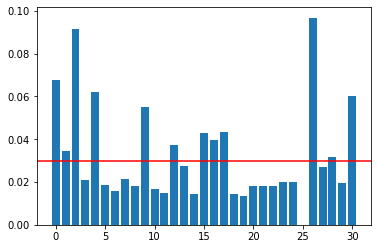

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data.to_numpy(), target, test_size=0.2, random_state=0)

clf = XGBClassifier()

print(x_train)

# Rebalancing training set
obj = imblearn.over_sampling.SMOTEN(random_state=0, n_jobs=4)

print(sorted(Counter(y_train).items()))

x_train, y_train = obj.fit_resample(x_train, y_train)

print(sorted(Counter(y_train).items()))

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


# print(y_pred, y_test)

display(f1_score(y_test, y_pred, average='macro'))
display(recall_score(y_test, y_pred, average='macro'))
display(precision_score(y_test, y_pred, average='macro'))

thresh = 0.03

imp = clf.feature_importances_
plt.bar(list(range(len(imp))), imp)
plt.axhline(y=thresh, color='r')
plt.show()

In [120]:
featuresToKeep = [data.columns[i] for i in range(len(imp)) if imp[i] > thresh]

featuresToKeep

featureSelectedDF = data[featuresToKeep]
featureSelectedDF['Mortality14Days'] = target.values
featureSelectedDF


C:\Users\benma\AppData\Local\Temp/ipykernel_25296/2506733088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureSelectedDF['Mortality14Days'] = target.values


,los_high,los_low,age_high,age_medium,comorbidity_high,comorbidity_low,comorbidity_medium,sofa_high,sofa_low,respiration_high,...,liver_low,liver_medium,renal_high,renal_low,renal_medium,cns_high,cns_low,cns_medium,gender_female,Mortality14Days
PatientID,,,,,,,,,,,,,,,,,,,,,
181199,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
167020,0,1,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
169463,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
183338,0,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
192665,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106017,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
186511,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
188867,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [121]:
target.value_counts()

0    4584
1     678
Name: Mortality14Days, dtype: int64

In [110]:
# featureSelectedDF.to_csv("./categorisedData/categorisedData_featureSelected.csv")

In [122]:
data = featureSelectedDF.drop('Mortality14Days', axis=1)

# x_train, x_test, y_train, y_test = train_test_split(data.to_numpy(), target, test_size=0.2, random_state=0)

# clf = XGBClassifier()

# clf = clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test)

# display(f1_score(y_test, y_pred, average='macro'))
# display(recall_score(y_test, y_pred, average='macro'))
# display(precision_score(y_test, y_pred, average='macro'))

# imp = clf.feature_importances_
# plt.bar(list(range(len(imp))), imp)
# plt.axhline(y=0.035, color='r')
# plt.show()

In [123]:
clf = KModes(n_clusters=3, init='Huang', n_init=20, n_jobs=4)

x = clf.fit_predict(data, categorical=list(range(len(data.columns))))

data['clusters'] = x

clusterTarget = pd.DataFrame(columns=['cluster', 'target'], data=[[i, j] for i, j in zip(x, target)])

clusterTarget

for x, group in clusterTarget.groupby('cluster'):
    print(group['target'].value_counts())

0    1772
1     316
Name: target, dtype: int64
0    1639
1     135
Name: target, dtype: int64
0    1173
1     227
Name: target, dtype: int64
